In [25]:
# seed the pseudorandom number generator
from random import seed
import random as rand
import numpy as np
import seaborn as sns
import pandas as pd
import pandas_datareader as web
import matplotlib as pyplot
import tensorflow
import sklearn
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# seed random number generator
seed(1)




In [38]:
prices = []

prices = pd.DataFrame(prices,columns  = ['name', 'sec' , 'price'])
prices.columns
prices.head()

,name,sec,price


In [44]:
def getNextPrice(cur , prices):
    if prices[prices['name']==cur]['name'].count() ==0:
        lastPrc = rand.random()*int(rand.random()*10)+1
        prices = prices.append({"name":cur,"sec":1,"price":lastPrc},ignore_index=True)
    else:
        lastSec = prices[prices['name']==cur]['sec'].max()+1
        lastPrc = prices[(prices['name']==cur) & (prices['sec']==lastSec-1)]['price']+(rand.randrange(-1,2)/10)
        x=pd.DataFrame({"name":cur,"sec":lastSec,"price":lastPrc})
        prices = prices.append(x,ignore_index=True)
    
    return prices ,lastPrc
    

In [45]:
for x in range(1,500):
    prices , lastprc = getNextPrice('btc',prices)
    prices , lastprc = getNextPrice('eth',prices)
    prices , lastprc = getNextPrice('otr',prices)
    
#print(lastprc)


<AxesSubplot:xlabel='sec', ylabel='price'>

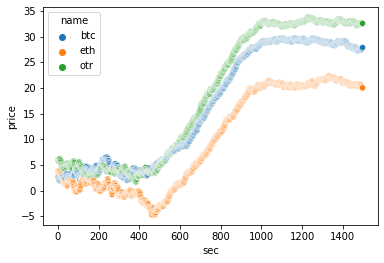

In [46]:
sns.scatterplot(data=prices, x="sec", y="price" , hue="name")